# ノック91 - データを読み込んで確認

In [1]:
import pandas as pd

不動産業者が町の住民に対して実施したアンケートを自然言語処理を用いて分析していく。

In [52]:
#アンケートの読み込み

survey = pd.read_csv("survey.csv")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [53]:
# 欠損値の確認

survey.isnull().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [54]:
# 欠損値の除去

survey.dropna(inplace = True)
survey.isnull().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

# ノック92 - 不要な文字を除外する

アンケートのコメント欄から、「AA」という文字を削除する。

In [61]:
survey_re = survey.copy()

In [62]:
survey_re["comment"]

0               駅前に若者が集まっている(AA駅)
1                スポーツできる場所があるのが良い
2                       子育て支援が嬉しい
3                 保育園に入れる（待機児童なし）
4                       駅前商店街が寂しい
                 ...             
81              小学校の校庭が芝生なのでとても良い
82    ホームページからアンケートを投稿できるようにしてほしい
83                  公園に遊び道具が少なすぎる
84                  もっと公園を増やしてほしい
85                  駅前に駐車場が少ない、不便
Name: comment, Length: 84, dtype: object

In [63]:
survey_re["comment"] = survey_re["comment"].str.replace("AA", "")  
survey_re.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


次に、正規表現を使って()に囲まれた文字を削除していく。

In [27]:
import re

In [64]:
survey_re["comment"] = survey_re["comment"].str.replace(r"\(.*\)", "", regex = True)
survey_re.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


(待機児童なし)が消えていないが、大文字の括弧を使っているためと考えられる。  
これも削除する。

In [65]:
survey_re["comment"] = survey_re["comment"].str.replace(r"\（.*\）", "", regex = True)
survey_re.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


# ノック93 - 文字数をカウントしてヒストグラムを表示

アンケートコメント欄の文字数の長さを計算する。

In [70]:
survey_re["length"] = 0

for i in range(len(survey_re.index)):
    survey_re.iloc[i, 3] = len(survey_re.iloc[i,1])
survey_re.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


ヒストグラムを表示する。

In [72]:
import matplotlib.pyplot as plt

(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <a list of 10 Patch objects>)

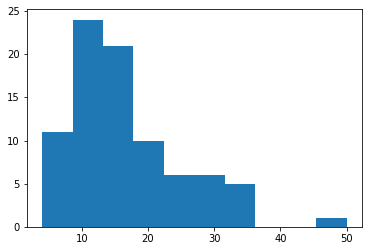

In [73]:
plt.hist(survey_re["length"])

「駅前に若者が集まっている」が12文字だったため、同じくらいの長さの一言コメントが多い事が分かる。

# ノック94 - 形態素解析で文章を分割(ここから自身の解答)

「すもももももももものうち」を形態素解析し、品詞ごとに抜き出す。

In [74]:
pip install mecab

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mecab-python3

Note: you may need to restart the kernel to use updated packages.


In [1]:
import MeCab

In [3]:
pip install unidic-lite

  Created wheel for unidic-lite: filename=unidic_lite-1.0.7-py3-none-any.whl size=47556599 sha256=790be1763011e3f37e2305397af5b2217c16fbf15873eac0d7617fcf2fa2de18
  Stored in directory: c:\users\takeshi\appdata\local\pip\cache\wheels\27\d8\1b\21bccbfc072280bbfd4ecf2baa25d4a695e1f91282a73b2fe4
Successfully built unidic-lite
Note: you may need to restart the kernel to use updated packages.


In [34]:
# 形態素に分割

mecab = MeCab.Tagger()
data = "すもももももももものうち"
mecab.parse(data)

'すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n'

In [35]:
#品詞毎に改行

lines = mecab.parse(data).split('\n')

In [36]:
#各行の先頭を抜き出す

words = []
for i in range(len(lines)-2):
    words.append(re.split(r"[\t]", lines[i])[0])
words

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']